In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
cc_df = pd.read_csv('/Users/yasaswi/Documents/marlabs/training/datasets/creditcard.csv')

In [4]:
cc_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
cc_df = pd.read_csv('/Users/yasaswi/Documents/marlabs/training/datasets/creditcard.csv').rename({"Class":"Fraud_Flag"}, axis=1)

In [6]:
cc_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud_Flag
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
from sklearn.model_selection import train_test_split

X=pd.get_dummies(cc_df.iloc[:,1:30], dtype="int", drop_first=True)
y=cc_df["Fraud_Flag"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=5000)
lr = logreg.fit(X_train,y_train)

In [9]:
print(f"Train Accuracy: {lr.score(X_train,y_train)}")
print(f"Test Accuracy: {lr.score(X_test,y_test)}")
# f1_score
# precision_recall_curve
from sklearn.metrics import f1_score
f1_score(y_test, lr.predict(X_test))

Train Accuracy: 0.9991573218635476
Test Accuracy: 0.9992275552122467


0.7471264367816093

In [10]:
y.value_counts()

Fraud_Flag
0    284315
1       492
Name: count, dtype: int64

In [11]:
import imblearn.over_sampling as OS

n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1: n_pos * 4, 0: n_neg}

In [12]:
ROS = OS.RandomOverSampler(sampling_strategy=ratio, random_state=101)
X_train_rs, y_train_rs = ROS.fit_resample(X_train, y_train)
print(f"Original positive class count: {np.sum(y_train)}")
print(f"Oversampled positive class count: {np.sum(y_train_rs)}")

Original positive class count: 389
Oversampled positive class count: 1556


In [13]:
# f1_score
# precision_recall_curve
# intersection point should be the best threshold
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=5000)
lr = logreg.fit(X_train_rs,y_train_rs)

In [14]:
f1_score(y_test, lr.predict(X_test))

0.8442211055276382

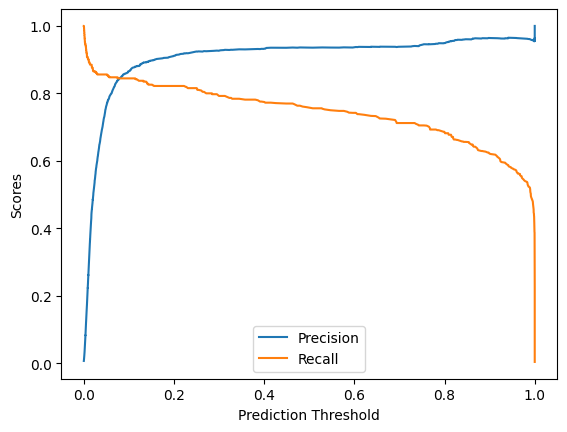

In [27]:
# precision recall curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

p_curve, r_curve, t_curve = precision_recall_curve(y_train_rs, lr.predict_proba(X_train_rs)[:, 1])
plt.plot(t_curve, p_curve[:-1], label="Precision")
plt.plot(t_curve, r_curve[:-1], label="Recall")
plt.ylabel("Scores")
plt.xlabel("Prediction Threshold")
plt.legend()
plt.show()


In [20]:
print(f"oversmapled Test f1: {f1_score(y_test, lr.predict_proba(X_test)[:,1]>.44)}")

oversmapled Test f1: 0.8399999999999999


In [28]:
# SMOTE = synthetic minority oversampling technique
import imblearn.over_sampling as OS

n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1: n_pos * 4, 0: n_neg}

smt = OS.SMOTE(sampling_strategy=ratio, random_state=101)
X_train_rs, y_train_rs = smt.fit_resample(X_train, y_train)
print(f"Original positive class count: {np.sum(y_train)}")
print(f"Oversampled positive class count: {np.sum(y_train_rs)}")

Original positive class count: 389
Oversampled positive class count: 1556


In [33]:
lr.fit(X_train_rs, y_train_rs)
print(f"oversmapled Test f1: {f1_score(y_test, lr.predict(X_test))}")

oversmapled Test f1: 0.8557213930348259


In [45]:
import imblearn.under_sampling as US

# define minority class %%
minority_pct = .01
# n_pos = np.sum(y_train == 1)
# n_neg = np.sum(y_train == 0)
# ratio = {1: n_pos * 4, 0: n_neg}

RUS = US.RandomUnderSampler(sampling_strategy=(minority_pct)/(1-minority_pct), random_state=101)
X_train_rs, y_train_rs = RUS.fit_resample(X_train, y_train)
print(f"Original neagtive class count: {np.mean(y_train)}")
print(f"Undersampled negative class count: {np.mean(y_train_rs)}")

Original neagtive class count: 0.0017073010160416073
Undersampled negative class count: 0.01


In [46]:
lr.fit(X_train_rs, y_train_rs)
print(f"undersampled Test f1: {f1_score(y_test, lr.predict(X_test))}")

undersampled Test f1: 0.8349514563106796


In [47]:
X_train_rs.shape

(38900, 29)

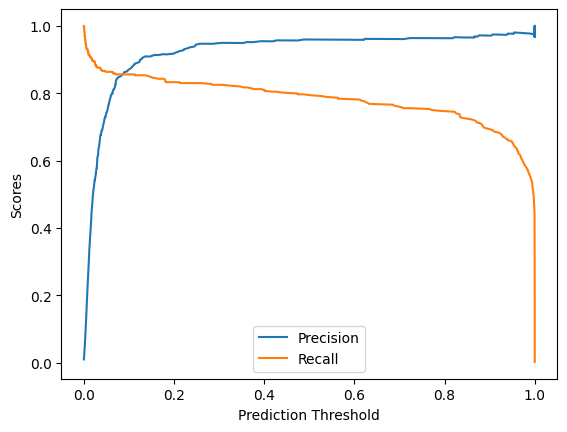

In [48]:
# precision recall curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

p_curve, r_curve, t_curve = precision_recall_curve(y_train_rs, lr.predict_proba(X_train_rs)[:,1])
plt.plot(t_curve, p_curve[:-1], label="Precision")
plt.plot(t_curve, r_curve[:-1], label="Recall")
plt.ylabel("Scores")
plt.xlabel("Prediction Threshold")
plt.legend()
plt.show()


In [52]:
lr = LogisticRegression(max_iter = 5000)
lr.fit(X_train, y_train)
print(f"Test f1: {f1_score(y_test, lr.predict(X_test))}")


Test f1: 0.7471264367816093


In [53]:
lr = LogisticRegression(max_iter = 5000, class_weight='balanced')
lr.fit(X_train, y_train)
print(f"Test f1: {f1_score(y_test, lr.predict(X_test))}")

Test f1: 0.1209362808842653


In [54]:
lr = LogisticRegression(max_iter = 5000, class_weight={1: 4, 0: 1})
lr.fit(X_train, y_train)
print(f"Test f1: {f1_score(y_test, lr.predict(X_test))}")

Test f1: 0.8442211055276382
